In [30]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
diabetis_df = pd.read_csv('diabetes.csv')
diabetis_df['BloodPressure'] = diabetis_df['BloodPressure'].replace(0,np.NaN)
diabetis_df['SkinThickness'] = diabetis_df['SkinThickness'].replace(0,np.NaN)
diabetis_df['BMI'] = diabetis_df['BMI'].replace(0,np.NaN)
diabetis_df['Insulin'] = diabetis_df['Insulin'].replace(0,np.NaN)

diabetis_df.isnull().sum()
diabetis_df['Pregnancies'].value_counts()


missing_values_df = pd.DataFrame({'column_name':diabetis_df.columns,
                                  'missing_value_count':diabetis_df.isnull().sum(),
                                  'missing_value_percent':diabetis_df.isnull().sum()/diabetis_df.shape[0]*100})
missing_values_df=missing_values_df.sort_values(by='missing_value_percent',ascending=False)
missing_values_df


diabetis_df['Pregnancies']=diabetis_df['Pregnancies'].astype('object')

diabetis_df.dtypes

y = diabetis_df['Outcome']
y
diabetis_df.drop(columns='Outcome',inplace=True)
diabetis_df
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [2]:
cols_to_drop=[]

for col in diabetis_df.columns:
    if diabetis_df[col].nunique()==diabetis_df.shape[0] or diabetis_df[col].nunique()==1:
        cols_to_drop.append(col)
        
cols_to_drop


diabetis_df.isnull().sum()

Pregnancies                   0
Glucose                       0
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
dtype: int64

In [22]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test=train_test_split(diabetis_df,y,test_size=0.2,random_state=26)
for col in X_train.columns:
        if X_train[col].dtype==object:
            X_train[col]=X_train[col].fillna(X_train[col].mode()[0]).astype(object)
            X_test[col]=X_test[col].fillna(X_train[col].mode()[0]).astype(object)
        else:
            X_train[col]=X_train[col].fillna(X_train[col].mean())
            X_test[col]=X_test[col].fillna(X_train[col].mean())
X_train      
Y_train


X_test
# Y_test

# X_train['Pregnancies'].dtype

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
355,9,165,88.000000,29.183066,153.236593,30.4,0.302,49
123,5,132,80.000000,29.183066,153.236593,26.8,0.186,69
551,3,84,68.000000,30.000000,106.000000,31.9,0.591,25
586,8,143,66.000000,29.183066,153.236593,34.9,0.129,41
114,7,160,54.000000,32.000000,175.000000,30.5,0.588,39
...,...,...,...,...,...,...,...,...
379,0,93,100.000000,39.000000,72.000000,43.4,1.021,35
297,0,126,84.000000,29.000000,215.000000,30.7,0.520,24
286,5,155,84.000000,44.000000,545.000000,38.7,0.619,34
222,7,119,72.360544,29.183066,153.236593,25.2,0.209,37


In [20]:
#preproceesing
from sklearn.preprocessing import MinMaxScaler

min_max=MinMaxScaler()

for col in X_train.columns:
    if(X_train[col].dtype!=object):
        X_train[col]=min_max.fit_transform(X_train[[col]])
        X_test[col]=min_max.fit_transform(X_test[[col]])


X_test
X_train
# Y_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
294,0,0.809045,0.265306,0.241120,0.165345,0.075665,0.078187,0.733333
559,11,0.427136,0.510204,0.241120,0.165345,0.243354,0.098623,0.233333
103,1,0.407035,0.489796,0.119565,0.028916,0.171779,0.091071,0.050000
532,1,0.432161,0.428571,0.489130,0.059036,0.472393,0.372723,0.133333
660,10,0.814070,0.612245,0.241120,0.165345,0.194274,0.046202,0.550000
...,...,...,...,...,...,...,...,...
77,5,0.477387,0.489796,0.282609,0.165345,0.398773,0.129720,0.100000
723,5,0.587940,0.632653,0.250000,0.107229,0.427403,0.076855,0.350000
102,0,0.628141,0.734694,0.241120,0.165345,0.087935,0.081741,0.000000
432,1,0.402010,0.510204,0.043478,0.053012,0.241309,0.199467,0.016667


In [5]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

logreg.fit(X_train,Y_train)
y_pred = logreg.predict(X_test)


comp_df = pd.DataFrame({'Actual_values': Y_test,'Predicted':y_pred})
comp_df

,Actual_values,Predicted
355,1,1
123,0,0
551,0,0
586,1,1
114,1,1
...,...,...
379,0,0
297,0,0
286,0,1
222,0,0


In [16]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
y_pred_proba

array([0.67856408, 0.40524619, 0.2076826 , 0.62419499, 0.68412018,
       0.23455997, 0.60609283, 0.11911465, 0.77827027, 0.30869929,
       0.27775751, 0.12620356, 0.60920552, 0.5934226 , 0.48018358,
       0.15551474, 0.28449268, 0.25170872, 0.3057545 , 0.65169153,
       0.20087511, 0.35145151, 0.18779679, 0.26689835, 0.1723744 ,
       0.7547555 , 0.4577808 , 0.16045202, 0.41826171, 0.21277005,
       0.22593701, 0.52008691, 0.1920392 , 0.80438671, 0.2700065 ,
       0.75539455, 0.73900566, 0.22670354, 0.94456574, 0.05782354,
       0.37982094, 0.31815512, 0.78826784, 0.8113491 , 0.29460103,
       0.46107397, 0.65821958, 0.38537344, 0.19366076, 0.43848842,
       0.2282087 , 0.8195717 , 0.2001718 , 0.37292817, 0.35351864,
       0.09425833, 0.34417794, 0.34094926, 0.24734948, 0.44026857,
       0.45565303, 0.08666329, 0.41400028, 0.68296771, 0.53254949,
       0.82765227, 0.23120091, 0.26326393, 0.21014583, 0.17770922,
       0.55535156, 0.88482404, 0.39986632, 0.26472916, 0.36845

In [17]:
from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score,roc_auc_score,roc_curve
confusion_matrix(Y_test,y_pred)
recall_score(Y_test,y_pred)
precision_score(Y_test,y_pred)

f1_score(Y_test,y_pred)

0.673469387755102

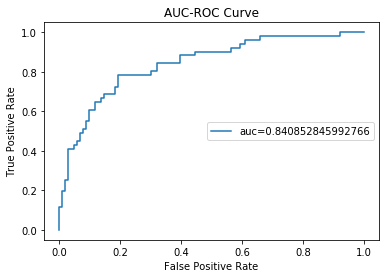

In [18]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score,roc_auc_score,roc_curve
fpr,tpr,thresholds = roc_curve(Y_test,y_pred_proba) # the function roc_curve returns three values, the False Positive Rate,True Positive rate
                                                # threshold values it used to calculate the TPR and FPR

auc = roc_auc_score(Y_test,y_pred_proba)

plt.plot(fpr,tpr,label="auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC-ROC Curve')

plt.legend(loc=5)
plt.show()

In [10]:
fpr,tpr,thresholds

comp_df = pd.DataFrame({'Thresholds':thresholds,
                         'FPR':fpr,
                          'TPR':tpr})
comp_df
fpr,tpr,thresholds
comp_df


,Thresholds,FPR,TPR
0,1.944566,0.000000,0.000000
1,0.944566,0.000000,0.019608
2,0.811349,0.000000,0.117647
3,0.804387,0.009709,0.117647
4,0.786016,0.009709,0.196078
5,0.778270,0.019417,0.196078
6,0.752209,0.019417,0.254902
7,0.740025,0.029126,0.254902
8,0.678564,0.029126,0.411765
9,0.657235,0.048544,0.411765
